In [10]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 6.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install geopy

     |████████████████████████████████| 112kB 7.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install geocoder

     |████████████████████████████████| 102kB 20.2MB/s ta 0:00:01
     |████████████████████████████████| 92kB 5.7MB/s eta 0:00:011
     |████████████████████████████████| 829kB 30.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [49]:

import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

In [105]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


In [65]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [118]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='brown',
        fill=True,
        fill_color='mediumseagreen',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [119]:
CLIENT_ID = 'NOE3LYTH0FA4M35IVZBHPJ123A4WXTJABOFUGGUQ4IE0RUEJ' 
CLIENT_SECRET = 'QWEIO02K3PWSHK5WYWQ32BH3QDCPFPR1SITGIMG4XOLZ4MHC' 
VERSION = '20180605'


In [120]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

In [122]:
venue_id ={
    'Musée du Louvre': '4adcda10f964a520af3521e3',
    'Cathédrale Notre-Dame de Paris': '4adcda09f964a520e83321e3',
    'Tour Eiffel': '51a2445e5019c80b56934c75',
    'Arc de Triomphe': '4adcda09f964a520de3321e3'
}

for key,value in venue_id.items():
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(value, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print('Venue :', key)
        print('Rating : ', result['response']['venue']['rating'])
        print('Total Tips : ', result['response']['venue']['tips']['count'])
        print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
        print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
        
        print()

    except:
        print('This venue has not been rated yet.')

Venue : Musée du Louvre
Rating :  9.4
Total Tips :  2268
Nb Likes :  167
Nb Likes / Total Tips 7.363315696649029

Venue : Cathédrale Notre-Dame de Paris
Rating :  9.4
Total Tips :  981
Nb Likes :  57
Nb Likes / Total Tips 5.81039755351682

Venue : Tour Eiffel
Rating :  9.4
Total Tips :  2653
Nb Likes :  933
Nb Likes / Total Tips 35.167734640030154

Venue : Arc de Triomphe
Rating :  9.5
Total Tips :  775
Nb Likes :  102
Nb Likes / Total Tips 13.161290322580646



In [123]:

paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
paris_data_venues

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
5,Musée du Louvre,48.860611,2.335450,모나리자 / 라 조콘다 (Mona Lisa | La Joconde),56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie, d'Océanie et des Amériques",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
9,Musée du Louvre,48.860611,2.335450,Le Café Marly,4adcda04f964a520503221e3,48.861740,2.335646,Café


In [71]:
paris_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Arc de Triomphe,73,73,73,73,73,73,73
Musée du Louvre,62,62,62,62,62,62,62
Notre Dame de Paris,76,76,76,76,76,76,76
Tour Eiffel,49,49,49,49,49,49,49


In [124]:
df_view_new = paris_data_venues.groupby('Lieux').count()
df_paris_histo = df_view_new['Venue']
df_paris_histo

Lieux
Arc de Triomphe        73
Musée du Louvre        62
Notre Dame de Paris    76
Tour Eiffel            49
Name: Venue, dtype: int64

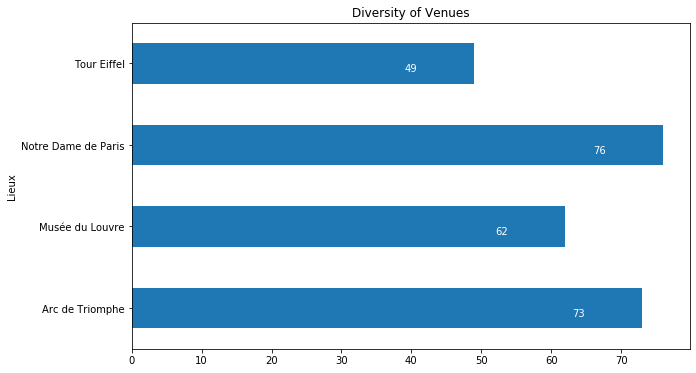

In [128]:

df_paris_histo.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Diversity of Venues') # add title to the plot

for index, value in enumerate(df_paris_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [74]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

,Lieux,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lebanese Restaurant,Library,Men's Store,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Musée du Louvre,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Antique Shop,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lebanese Restaurant,Library,Men's Store,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Arc de Triomphe,0.000000,0.000000,0.000000,0.013699,0.013699,0.027397,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.000000,0.013699,0.000000,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397,0.013699,0.013699,0.013699,0.000000,0.013699,0.013699,0.013699,0.013699,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.136986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205479,0.013699,0.000000,0.000000,0.082192,0.027397,0.027397,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.013699,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.027397,0.013699,0.000000,0.000000,0.000000,0.000000,0.013699,0.027397,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.000000
1,Musée du Louvre,0.016129,0.048387,0.016129,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.016129,0.016129,0.000000,0.000000,0.016129,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.032258,0.016129,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.016129,0.000000,0.032258,0.000000,0.000000,0.000000,0.161290,0.016129,0.016129,0.016129,0.000000,0.048387,0.000000,0.096774,0.000000,0.000000,0.000000,0.032258,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.016129,0.016129,0.000000,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.016129,0.016129,0.000000,0.000000,0.000000,0.000000,0.016129,0.016129,0.000000,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000
2,Notre Dame de Paris,0.000000,0.000000,0.013158,0.000000,0.000000,0.052632,0.039474,0.013158,0.000000,0.013158,0.039474,0.039474,0.000000,0.013158,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.013158,0.000000,0.013158,0.013158,0.000000,0.013158,0.052632,0.000000,0.026316,0.000000,0.000000,0.013158,0.000000,0.013158,0.000000,0.000000,0.013158,0.026316,0.013158,0.078947,0.000000,0.026316,0.000000,0.013158,0.013158,0.013158,0.039474,0.000000,0.013158,0.039474,0.000000,0.039474,0.000000,0.013158,0.000000,0.026316,0.000000,0.013158,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.013158,0.013158,0.000000,0.013158,0.000000,0.052632,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.013158,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.013158,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158
3,Tour Eiffel,0.000000,0.020408,0.000000,0.000000,

In [76]:
num_top_venues = 10

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                 venue  freq
0                Hotel  0.21
1    French Restaurant  0.14
2   Italian Restaurant  0.08
3  Japanese Restaurant  0.03
4           Steakhouse  0.03
5    Electronics Store  0.03
6       Sandwich Place  0.03
7       Clothing Store  0.03
8        Jewelry Store  0.03
9               Bakery  0.03


----Musée du Louvre----
                venue  freq
0   French Restaurant  0.16
1               Hotel  0.10
2               Plaza  0.06
3                Café  0.06
4       Historic Site  0.05
5          Art Museum  0.05
6      Clothing Store  0.03
7  Italian Restaurant  0.03
8             Exhibit  0.03
9      Cosmetics Shop  0.03


----Notre Dame de Paris----
                 venue  freq
0    French Restaurant  0.08
1               Bakery  0.05
2          Coffee Shop  0.05
3                Plaza  0.05
4               Bistro  0.04
5            Bookstore  0.04
6  Japanese Restaurant  0.04
7  Indie Movie Theater  0.04
8                  Bar  0.04
9  

In [77]:

 def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
#Now let's create the new dataframe 
#and display the top 10 venues for each Lieux.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Nightclub,Sandwich Place,Clothing Store,Jewelry Store,Japanese Restaurant,Steakhouse,Bakery
1,Musée du Louvre,French Restaurant,Hotel,Café,Plaza,Historic Site,Art Museum,Cosmetics Shop,Coffee Shop,Clothing Store,Italian Restaurant
2,Notre Dame de Paris,French Restaurant,Plaza,Coffee Shop,Bakery,Bookstore,Indie Movie Theater,Bistro,Hotel,Japanese Restaurant,Bar
3,Tour Eiffel,French Restaurant,Italian Restaurant,Hotel,Bakery,Café,Plaza,Brasserie,Garden,Convenience Store,Champagne Bar


In [79]:
# set number of clusters
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2], dtype=int32)

In [80]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each Lieux.

paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 
# check the last columns!

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Café,Plaza,Historic Site,Art Museum,Cosmetics Shop,Coffee Shop,Clothing Store,Italian Restaurant
1,Notre Dame de Paris,48.852968,2.347708,3,French Restaurant,Plaza,Coffee Shop,Bakery,Bookstore,Indie Movie Theater,Bistro,Hotel,Japanese Restaurant,Bar
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Nightclub,Sandwich Place,Clothing Store,Jewelry Store,Japanese Restaurant,Steakhouse,Bakery
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Hotel,Bakery,Café,Plaza,Brasserie,Garden,Convenience Store,Champagne Bar


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [82]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48.860611,Hotel,Café,Plaza,Historic Site,Art Museum,Cosmetics Shop,Coffee Shop,Clothing Store,Italian Restaurant


In [83]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,48.873792,French Restaurant,Italian Restaurant,Nightclub,Sandwich Place,Clothing Store,Jewelry Store,Japanese Restaurant,Steakhouse,Bakery


In [84]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,48.85837,Italian Restaurant,Hotel,Bakery,Café,Plaza,Brasserie,Garden,Convenience Store,Champagne Bar


In [85]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,48.852968,Plaza,Coffee Shop,Bakery,Bookstore,Indie Movie Theater,Bistro,Hotel,Japanese Restaurant,Bar


In [86]:
lieux_latitude = paris_data.loc[3, 'Latitude'] # lieux latitude value
lieux_longitude = paris_data.loc[3, 'Longitude'] # Lieux  longitude value

lieux_name = paris_data.loc[3, 'Lieux'] # Lieux name

print('Latitude and longitude values of {} are {}, {}.'.format(lieux_name, 
                                                               lieux_latitude, 
                                                               lieux_longitude))

Latitude and longitude values of Tour Eiffel are 48.8583701, 2.2944812999999997.


In [87]:
#First, let's create the GET request URL. Name your URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lieux_latitude,lieux_longitude,radius,LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NOE3LYTH0FA4M35IVZBHPJ123A4WXTJABOFUGGUQ4IE0RUEJ&client_secret=QWEIO02K3PWSHK5WYWQ32BH3QDCPFPR1SITGIMG4XOLZ4MHC&v=20180605&ll=48.8583701,2.2944812999999997&radius=500&limit=100'

In [88]:

#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e917ad0b9a389001b89938b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tour Eiffel - Parc du Champ-de-Mars',
  'headerFullLocation': 'Tour Eiffel - Parc du Champ-de-Mars, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 49,
  'suggestedBounds': {'ne': {'lat': 48.862870104500004,
    'lng': 2.301308246677155},
   'sw': {'lat': 48.8538700955, 'lng': 2.2876543533228446}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51a2445e5019c80b56934c75',
       'name': 'Tour Eiffel',
       'location': {'address': '5 avenue Anatole France',
        'lat': 48.85825817805569,
        'lng': 2.294423282146454,
        'labeledLatLn

In [89]:

# def Categories with Foursquare Type
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [90]:
# Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng,id
0,Tour Eiffel,Monument / Landmark,48.858258,2.294423,51a2445e5019c80b56934c75
1,Le Jules Verne,French Restaurant,48.858245,2.294530,4b5972b9f964a5208b8828e3
2,Sommet de la Tour Eiffel,Scenic Lookout,48.858331,2.294501,58c41f2b0e0a1e57d8dc841c
3,Restaurant 58 Tour Eiffel,French Restaurant,48.858366,2.294249,4e078807e4cdefcff6dce4f6
4,Bar à Champagne,Champagne Bar,48.858313,2.294411,4d55537db4deb1f71d41037a
5,Carrousel de la Tour Eiffel,Theme Park Ride / Attraction,48.858972,2.292631,4dab1ab0fa8cc76497446a89
6,Residence Charles Floquet,Hotel,48.856306,2.294318,54c57345498e47f3d60203c7
7,Musée du Quai Branly – Jacques Chirac,Art Museum,48.860849,2.297423,4adcda10f964a520ae3521e3
8,Capriccio Sorrentino,Italian Restaurant,48.859208,2.297896,50b60a4ee4b0c55f394cee7a
9,Place Jacques Rueff,Plaza,48.856183,2.298007,5427e002498e8525dc98dd65


In [91]:
venue_id = '51a2445e5019c80b56934c75' # Tour Eiffel 51a2445e5019c80b56934c75
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('Rating : ', result['response']['venue']['rating'])
    print('Total Tips : ', result['response']['venue']['tips']['count'])
    print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
    print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
except:
    print('This venue has not been rated yet.')

Rating :  9.4
Total Tips :  2653
Nb Likes :  933
Nb Likes / Total Tips 35.167734640030154


In [92]:

## Ecco Tips
venue_id = '51a2445e5019c80b56934c75'
limit = 200 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e917b89f7706a001b00b240'},
 'response': {'tips': {'count': 2653,
   'items': [{'id': '51dacd8c498e81059bd6817e',
     'createdAt': 1373293964,
     'text': 'Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/51dacd8c498e81059bd6817e',
     'photo': {'id': '51dacd8e7dd24494a9f55740',
      'createdAt': 1373293966,
      'source': {'name': 'Foursquare Web', 'url': 'https://foursquare.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
      'width': 755,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
     'lang': 'en',
     'likes': {'count': 933,
      'groups': [{'type': 'others', 'count': 933, 'items': []

In [93]:
# test avis sur Lieux
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'lastVoteText', 'lastUpvoteTimestamp', 'todo', 'user'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [95]:

#First, let's create the GET request URL. Name your URL url.
LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=NOE3LYTH0FA4M35IVZBHPJ123A4WXTJABOFUGGUQ4IE0RUEJ&client_secret=QWEIO02K3PWSHK5WYWQ32BH3QDCPFPR1SITGIMG4XOLZ4MHC&ll=48.8566969,2.3514616&v=20180605&radius=500&limit=150'

In [96]:
results = requests.get(url).json()
'There are {} popular spots around.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular spots around.'

In [97]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bf41231e5eba59334341f90',
  'name': "Place de l'Hôtel de Ville – Esplanade de la Libération",
  'location': {'address': "Place de l'Hôtel de Ville",
   'lat': 48.85692475726913,
   'lng': 2.3514118156673676,
   'distance': 25,
   'postalCode': '75004',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ["Place de l'Hôtel de Ville", '75004 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4bf41231e5eba59334341f90-0'}

In [98]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [99]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,labeledLatLngs,crossStreet,neighborhood,id
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza,Place de l'Hôtel de Ville,48.856925,2.351412,25,75004,FR,Paris,Île-de-France,France,"[Place de l'Hôtel de Ville, 75004 Paris, France]",NaN,NaN,NaN,4bf41231e5eba59334341f90
1,Parc Rives de Seine,Park,Quais de Seine,48.855510,2.351419,132,75000,FR,Paris,Île-de-France,France,"[Quais de Seine, 75000 Paris, France]","[{'label': 'display', 'lat': 48.85551048052973, 'lng': 2.3514188826084137}]",NaN,NaN,58e0f18f561ded7abcbbbd01
2,L'Alsacien,Alsatian Restaurant,6 rue Saint-Bon,48.858275,2.350381,192,75004,FR,Paris,Île-de-France,France,"[6 rue Saint-Bon, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85827502747949, 'lng': 2.3503806119494897}]",NaN,NaN,54351b59498e123ee4afc7ff
3,Berges de Seine – Rive droite,Pedestrian Plaza,De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal,48.855131,2.352289,184,NaN,FR,Paris,Île-de-France,France,"[De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal, Paris, France]","[{'label': 'display', 'lat': 48.855130568830376, 'lng': 2.352289446225441}]",NaN,NaN,58d800df9435a979b8a645fa
4,Square de la Tour Saint-Jacques,Park,88 rue de Rivoli,48.857882,2.348757,238,75001,FR,Paris,Île-de-France,France,"[88 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.857882297703746, 'lng': 2.348756790161133}]",NaN,NaN,4dbd336b6a23e294ba405cfa
5,BHV Marais,Department Store,52 rue de Rivoli,48.857312,2.353633,173,75004,FR,Paris,Île-de-France,France,"[52 rue de Rivoli (Rue de Rivoli), 75004 Paris, France]","[{'label': 'display', 'lat': 48.8573123, 'lng': 2.3536331}]",Rue de Rivoli,NaN,4b4b6a3df964a520b89a26e3
6,Maison Aleph,Pastry Shop,20 rue de la Verrerie,48.857348,2.354873,260,75004,FR,Paris,Île-de-France,France,"[20 rue de la Verrerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.857348, 'lng': 2.354873}]",NaN,NaN,59247f4e0d2be70573edd834
7,Tour Saint-Jacques,Historic Site,88 rue de Rivoli,48.858031,2.348875,240,75004,FR,Paris,Île-de-France,France,"[88 rue de Rivoli, 75004 Paris, France]","[{'label': 'display', 'lat': 48.858030532545826, 'lng': 2.348874807357788}]",NaN,NaN,4b5c7d1ff964a5205f3229e3
8,Galerie Azzedine Alaïa,Art Gallery,18 rue de la Verrerie,48.857545,2.355217,290,75003,FR,Paris,Île-de-France,France,"[18 rue de la Verrerie, 75003 Paris, France]","[{'label': 'display', 'lat': 48.857544773243966, 'lng': 2.3552169725375203}]",NaN,NaN,4c0bc2fdbbc676b018f64bd5
9,Fleux',Furniture / Home Store,39 et 52 rue Sainte-Croix de la Bretonnerie,48.858763,2.354161,303,75004,FR,Paris,Île-de-France,France,"[39 et 52 rue Sainte-Croix de la Bretonnerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85876287681194, 'lng': 2.3541614413261414}]",NaN,NaN,4b533b45f964a520509327e3


In [100]:
newTest = dataframe_filtered[['name', 'categories']]
newTest

,name,categories
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza
1,Parc Rives de Seine,Park
2,L'Alsacien,Alsatian Restaurant
3,Berges de Seine – Rive droite,Pedestrian Plaza
4,Square de la Tour Saint-Jacques,Park
5,BHV Marais,Department Store
6,Maison Aleph,Pastry Shop
7,Tour Saint-Jacques,Historic Site
8,Galerie Azzedine Alaïa,Art Gallery
9,Fleux',Furniture / Home Store


In [101]:
print(dataframe_filtered.categories.unique())

['Plaza' 'Park' 'Alsatian Restaurant' 'Pedestrian Plaza'
 'Department Store' 'Pastry Shop' 'Historic Site' 'Art Gallery'
 'Furniture / Home Store' 'Ice Cream Shop' 'Bakery' 'French Restaurant'
 'Cosmetics Shop' 'Fountain' 'Auvergne Restaurant' 'Gay Bar'
 'Portuguese Restaurant' 'Café' 'Dessert Shop' 'Flower Shop' 'Coffee Shop'
 'Deli / Bodega' 'Seafood Restaurant' 'Tea Room' 'Church' 'Hotel'
 'Cupcake Shop' 'Clothing Store' 'Wine Bar' 'Cocktail Bar' 'Theater'
 'Miscellaneous Shop' 'Restaurant' 'Bookstore' 'Arts & Crafts Store'
 'Souvenir Shop' 'Scenic Lookout' 'Art Museum' 'Pub' 'Gourmet Shop'
 'Memorial Site' 'Bistro' 'Optical Shop' 'Salon / Barbershop'
 'Scandinavian Restaurant' 'Cultural Center' 'Creperie'
 'Burgundian Restaurant' 'Snack Place' 'Sculpture Garden'
 'Italian Restaurant' 'Waterfront' 'Japanese Restaurant' 'Brasserie']


In [102]:

## word clouds sur les tendances de ce lieux
!conda install -c conda-forge wordcloud==1.4.1 --yes


# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.1               |   py36h8328e55_0         654 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1009 KB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.1-py36h8328e55_0
  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



pil

In [106]:
newTest_words = dataframe_filtered[['categories']]
newTest_words.head()

,categories
0,Plaza
1,Park
2,Alsatian Restaurant
3,Pedestrian Plaza
4,Park


In [107]:

newTest_words.to_csv('myTexteTourEiffel.txt', sep=',', index=False)

In [108]:
myTest = open('myTexteTourEiffel.txt', 'r').read()

stopwords = set(STOPWORDS)

In [109]:
tour_eiffel_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=stopwords
)

tour_eiffel_wc.generate(myTest)

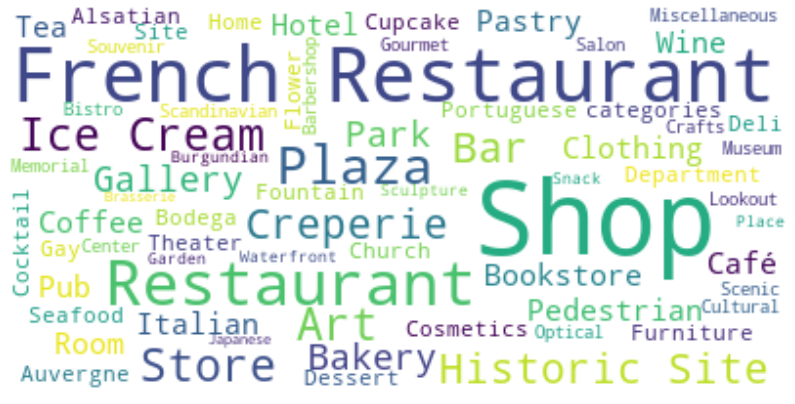

In [110]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(tour_eiffel_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [111]:
#Let's visualize these items on the map around our location¶
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

#colors = [purple, orange, darkred,lightred,beige,darkblue, darkgreen, cadetblue, darkpurple, pink, lightblue, lightgreen,lightgray]
# categories
#

# folium.Marker([lat, lon], popup=str(name)+': '+color+'-'+str(clname), icon=folium.Icon(color=color)).add_to(feature_group)

# add Ecco as a red circle mark
label = folium.Popup('eiffel', parse_html=True)
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup=label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, name, category in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        fill=True,
        color= 'green',
        fill_color = 'black',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [112]:
# tendances du quartier
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
#results

In [113]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [114]:
trending_venues_df

'No trending venues are available at the moment!'

In [115]:

#Visualize trending venues

if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    label = folium.Popup('Arc de Triomphe', parse_html=True)
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=15,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, name, category in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name'], trending_venues_df['categories']):
        label = '{}, {}'.format(name, category)
        label = folium.Popup(label, parse_html=True)
        folium.features.CircleMarker(
            [lat, lng],
            radius=10,
            poup=label,
            fill=True,
            color='blue',
            fill_color='black',
            fill_opacity=0.6
        ).add_to(venues_map)

In [116]:
venues_map

'Cannot generate visual as no trending venues are available at the moment!'